<a href="https://colab.research.google.com/github/ShreyJais/RL/blob/main/2348558_RL_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Implement temporal-difference learning in a simulated environment.

### Initialisation

In [1]:
import numpy as np

grid_size = 4
alpha = 0.1
gamma = 0.9
n_episodes = 500
reward_goal = 1.0
reward_step = -0.1

V = np.zeros((grid_size, grid_size))
goal_state = (grid_size - 1, grid_size - 1)
V[goal_state] = reward_goal

actions = ['up', 'down', 'left', 'right']
action_effects = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

### Terminal check

In [2]:
def is_terminal(state):
    return state == goal_state

### Next State,

In [3]:
def get_next_state(state, action):
    row, col = state
    dr, dc = action_effects[action]
    new_row, new_col = row + dr, col + dc
    if new_row < 0 or new_row >= grid_size or new_col < 0 or new_col >= grid_size:
        return state
    return (new_row, new_col)

### Temporal-difference learning

In [4]:
import random
def run_episode():
    state = (0, 0)
    while not is_terminal(state):
        action = random.choice(actions)
        next_state = get_next_state(state, action)
        reward = reward_goal if next_state == goal_state else reward_step
        V[state] += alpha * (reward + gamma * V[next_state] - V[state])
        state = next_state

### Execution

In [5]:
for episode in range(n_episodes):
    run_episode()
    if episode % 100 == 0:
        print(f"Episode {episode}:")
        print(V)

Episode 0:
[[-0.09598451 -0.06329456 -0.08646329  0.        ]
 [-0.13860341 -0.11898353 -0.10101534  0.        ]
 [-0.10087269 -0.07883123 -0.05404585 -0.0109    ]
 [-0.03271139 -0.04094633  0.17831995  1.        ]]
Episode 100:
[[-0.81608427 -0.79802112 -0.72196795 -0.72461587]
 [-0.77251657 -0.69725819 -0.52049886 -0.53171073]
 [-0.68241085 -0.53102036 -0.13061619  0.91624089]
 [-0.61924285 -0.29505535  0.23598284  1.        ]]
Episode 200:
[[-0.74491949 -0.70322398 -0.58530265 -0.44677098]
 [-0.70594491 -0.58506398 -0.35396958 -0.0952757 ]
 [-0.61086444 -0.49429544 -0.18337807  0.470309  ]
 [-0.56469812 -0.26859407  0.69769817  1.        ]]
Episode 300:
[[-0.80393489 -0.71047839 -0.62778663 -0.49434995]
 [-0.75733078 -0.67965885 -0.41777075 -0.28451767]
 [-0.64157451 -0.50505594  0.09384871  0.66224047]
 [-0.59636082 -0.28684783  0.69509004  1.        ]]
Episode 400:
[[-0.77665848 -0.71790858 -0.61001836 -0.45779729]
 [-0.73088496 -0.63041699 -0.50067751 -0.29745483]
 [-0.68044326 -

### Visualisation

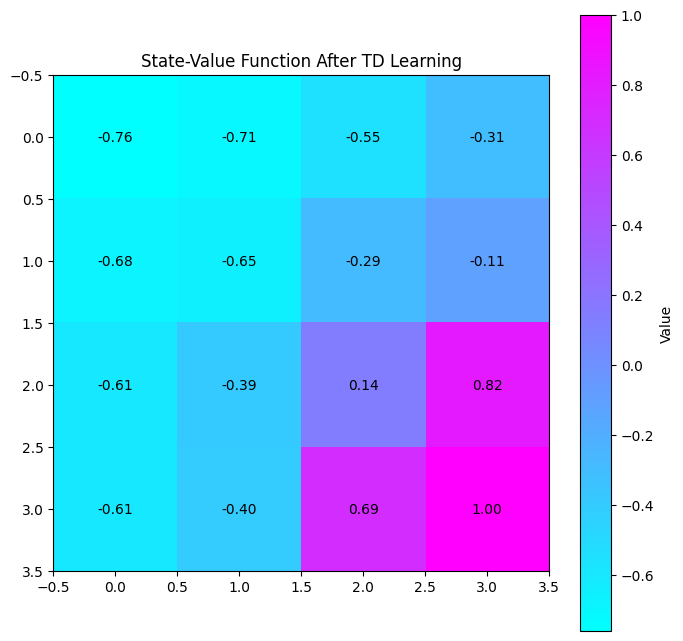

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(V, cmap='cool', interpolation='none', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, f"{V[i, j]:.2f}", ha='center', va='center', color='black')
plt.title("State-Value Function After TD Learning")
plt.colorbar(label="Value")
plt.show()